# Analysis of the Gravity wave drag

In [1]:
from netCDF4 import Dataset, num2date
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## Definitions

In [2]:
def anomalie(step,var):
    string = "time."+step   
    climatology = var.groupby(string).mean("time")
    anomalies = var.groupby(string) - climatology
    
    return anomalies

In [3]:
def sea(days_period,station,var):
    df_dates = pd.read_csv('/home/hochatmstud/bene/dates/without_final_warmings/ssw_dates_without_final_warmings_'+station+'.csv') # you can load SSWs from a csv file like attached
    dates = df_dates.set_index('BeginDate')

    xa_ls = []
    max_lag = days_period
    for il, days in enumerate(range(-max_lag,max_lag+1)):  
        sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
        mask = np.in1d(var.time.dt.floor('1D'),sel_dates)
        comp_m = var.sel(time = mask).mean('time')
        xa_ls.append(comp_m)
   
    xa_comp = xr.concat(xa_ls, dim = 'days')
    xa_comp['days'] = range(-max_lag, max_lag+1)

    # print(xa_comp)
    return xa_comp

## Analysis

In [4]:
station = 'Leipzig'

In [5]:
# Parameters
station = "RioGrande"


In [6]:
if station == 'Leipzig':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2004-08-01_2020-12-01_Col.nc'
elif station == 'CMOR':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2002-01-01_2020-11-01_CMA.nc'
elif station == 'Esrange':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_1999-08-01_2021-03-01_Kir.nc'
elif station == 'Sodankyla':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2008-10-01_2021-03-01_Sod.nc'
elif station == 'Davis':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2005-01-01_2020-12-01_Dav.nc'
elif station == 'RioGrande':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2008-02-01_2021-01-01_Rio.nc'
elif station == 'Andenes':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_1999-08-01_2019-12-01_SES.nc'

In [7]:
ds=xr.open_dataset(dir)

In [8]:
ds

<xarray.Dataset>
Dimensions:  (alt: 26, time: 113976)
Coordinates:
    month    (time) int64 ...
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-02-01 ... 2021-01-31T23:00:00
Data variables:
    GWD      (time, alt) float64 ...
Attributes:
    history:  Tue Jun  1 17:50:58 2021: ncrename -v __xarray_dataarray_variab...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [9]:
gwd = ds['GWD'] 

gwd_anomalie = anomalie('day',gwd)

sea_gwd = sea(40,station,gwd)
sea_gwd_anomalie = sea(40,'Leipzig',gwd_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


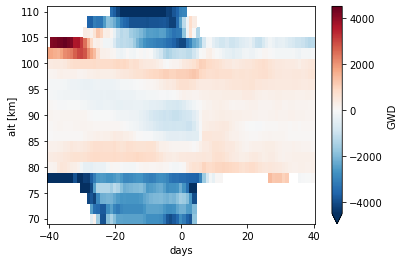

In [10]:
sea_gwd.sel(alt = slice(70,110)).plot(x='days',robust=True)